# Final Report

## 1. Variable Analysis

### (1) Outcome Analysis

#### UBS Stock Return 
* **Why:**  We choose stock returns over stock prices because returns are often stationary and suitable for models like ARIMA, GARCH, or machine learning algorithms, while stock prices are typically non-stationary and require transformations for effective modeling.
* **Where:** Get from UBS historical stock price CSV file.   
* **How:** Calculate log returns.
* **Code** `data_prepared/load.py`  --- `load_stock_return(ticker="UBS")`

In [2]:
from data_prepared.load import load_stock_return

UBS_stock_return = load_stock_return("UBS")
UBS_stock_return.head(5)

,Date,UBS log_return
1,2021-01-05,0.022146
2,2021-01-06,0.032989
3,2021-01-07,0.028723
4,2021-01-08,-0.016218
5,2021-01-11,-0.003932


### (2) Predictor Analysis

#### A. Bid-Ask Spread 
* **Why:** Measures liquidity by indicating the difference between buying and selling prices.  
* **Where:** Calculate estimated spread from historical high and low prices in the UBS stock price CSV file.  
* **How:** Use the Corwin and Schultz estimator in Python by calculating α, β, and γ based on the high and low prices in UBS Finance data.
* **Code** `data_prepared/load.py`  --- `load_bid_ask_spread(file_path="data/UBS.csv")`

In [2]:
from data_prepared.load import load_bid_ask_spread

UBS_bid_ask_spread_df = load_bid_ask_spread(file_path="data/UBS.csv")
UBS_bid_ask_spread_df.head(5)

,Date,Bid-Ask Spread
0,2021-01-04,NaN
1,2021-01-05,0.386902
2,2021-01-06,0.803480
3,2021-01-07,0.844275
4,2021-01-08,0.106417


#### B. Trading Volume 
* **Why:** Reflects the total volume of shares traded, indicating market interest and liquidity. 
* **Where:** Get from UBS historical stock price CSV file.  
* **Code** `data_prepared/load.py`  --- `trading_volume(file_path="data/UBS.csv")`

In [3]:
from data_prepared.load import trading_volume

UBS_trading_volume_df = trading_volume(file_path="data/UBS.csv")
UBS_trading_volume_df.head(5)

,Date,volume
0,2021-01-04,4974100
1,2021-01-05,3584400
2,2021-01-06,5241300
3,2021-01-07,4618000
4,2021-01-08,2133900


#### C. SPY500
* **Why:**  Including the SPY500 allows the model to capture the impact of U.S. market movements on UBS stock prices, enabling the analysis to factor in broader market trends and systemic risks associated with the U.S. economy.
* **Where:** The data is included in `data/SPY.csv` of this repository.
* **Code** `data_prepared/load.py`  --- `load_stock_return(ticker="SPY", verbose=verbose)`

In [4]:
import pandas as pd

SPY = pd.read_csv(
    r"data/SPY.csv"
)
SPY.sample(5)

,Unnamed: 0,open,high,low,close,adjclose,volume,ticker
424,2022-09-09,402.739990,407.510010,402.459991,406.600006,393.341827,76706900,SPY
372,2022-06-27,391.049988,391.359985,387.440002,388.589996,375.919067,66009600,SPY
117,2021-06-22,420.850006,424.000000,420.079987,423.109985,403.575409,57700300,SPY
657,2023-08-15,446.269989,446.640015,442.299988,442.890015,435.444916,75707500,SPY
569,2023-04-10,406.609985,409.690002,405.970001,409.609985,401.233948,63681000,SPY


#### D. FTSE 100 index
* **Why:**  By including the FTSE 100, the model accounts for regional market influences that might affect UBS, providing a more comprehensive view of how UBS stock prices react to economic conditions in the U.K. and Europe.
* **Where:** The data is included in `data/^FTSE.csv` of this repository.
* **Code** `data_prepared/load.py`  --- `FTSE_stock_return = load_stock_return(ticker="^FTSE", verbose=verbose)`

In [5]:
FTSE = pd.read_csv(
    r"data/^FTSE.csv"
)
FTSE.sample(5)

,Unnamed: 0,open,high,low,close,adjclose,volume,ticker
623,2023-06-27,7453.600098,7495.899902,7428.100098,7461.500000,7461.500000,674737200,^FTSE
77,2021-04-23,6938.200195,6938.600098,6891.799805,6938.600098,6938.600098,582223700,^FTSE
124,2021-07-01,7037.500000,7134.200195,7037.500000,7125.200195,7125.200195,631273700,^FTSE
622,2023-06-26,7461.899902,7476.500000,7401.200195,7453.600098,7453.600098,850546800,^FTSE
232,2021-12-01,7059.500000,7182.000000,7059.399902,7168.700195,7168.700195,779578300,^FTSE


#### E. CBOE Volatility Index (^VIX)
* **Why:**  The return of ^VIX, reflecting percentage changes in volatility, is more relevant for financial forecasting as it allows for better comparisons across periods and robust analysis, while ^VIX itself serves as a leading indicator of market sentiment and risk, making it a valuable predictor for changes in asset prices.
* **Where:** Get from CBOE Volatility Index CSV file.  
* **Code** `data_prepared/load.py`  --- `load_cboe_vix(file_path="data/^VIX.csv")`

In [6]:
from data_prepared.load import load_cboe_vix

UBS_trading_volume_df = load_cboe_vix(file_path="data/^VIX.csv")
UBS_trading_volume_df.head(5)

,Date,VIX
1,2021-01-05,-0.062341
2,2021-01-06,-0.010712
3,2021-01-07,-0.113951
4,2021-01-08,-0.036881
5,2021-01-11,0.110542


#### F. EUR/CHF
* **Why:**  Returns provide normalized measures of changes in the EUR/CHF exchange rate, enabling easier interpretation and comparison over time, while the exchange rate itself reflects economic stability and risk perceptions in Europe and Switzerland, making it a valuable predictor for models addressing European market dependencies and global financial dynamics.
* **Where:** Get from EUR/CHF CSV file.  
* **Code** `data_prepared/load.py`  --- `load_eur_chf(file_path="data/EURCHF=X.csv")`

In [7]:
from data_prepared.load import load_eur_chf

UBS_trading_volume_df = load_eur_chf(file_path="data/EURCHF=X.csv")
UBS_trading_volume_df.head(5)

,Date,EURCHF
1,2021-01-05,-0.001906
2,2021-01-06,0.000407
3,2021-01-07,0.003124
4,2021-01-08,0.002388
5,2021-01-11,-0.004133


#### H. Oil Prices
* **Why:**  Use returns instead of prices to ensure stationary of the data, which is crucial for effective modeling. Oil prices are a key economic indicator that affects global market conditions and company operators.
* **Where:** Get from Crude Oil Futures CSV file.
* **How:**  Calculate log returns (`log(current/previous)`).
* **Code** `data_prepared/load.py`  --- `load_oil_prices(file_path="data/CL=F.csv")`

In [8]:
from data_prepared.load import load_oil_prices

UBS_oil_prices_df = load_oil_prices(file_path="data/CL=F.csv")
UBS_oil_prices_df.head(5)

,Date,oil_log_return
1,2021-01-05,0.047369
2,2021-01-06,0.013922
3,2021-01-07,0.003942
4,2021-01-08,0.027362
5,2021-01-11,0.000191


#### I. Gold Prices
* **Why:**  Use returns instead of prices to ensure stationary of the data, which is crucial for effective modeling. Gold acts as a hedge against economic risk and market volatility. 
* **Where:** Get from COMEX Gold Futures CSV file.
* **How:**  Calculate log returns (`log(current/previous)`).
* **Code** `data_prepared/load.py`  --- `load_gold_prices(file_path="data/GC=F.csv")`

In [9]:
from data_prepared.load import load_gold_prices

UBS_gold_prices_df = load_gold_prices(file_path="data/GC=F.csv")
UBS_gold_prices_df.head(5)

,Date,gold_log_return
1,2021-01-05,0.004105
2,2021-01-06,-0.023734
3,2021-01-07,0.002828
4,2021-01-08,-0.041753
5,2021-01-11,0.008416


#### J.
* **Why:**  explain why use return but not price; explain why choose this as predictor
* **Where:** how to get the data
* **How:**  how to calculate
* **Code** `data_prepared/load.py`  --- `what function?`

#### K.
* **Why:**  explain why use return but not price; explain why choose this as predictor
* **Where:** how to get the data
* **How:**  how to calculate
* **Code** `data_prepared/load.py`  --- `what function?`

Correlation Matrix:
                  UBS log_return  Bid-Ask Spread    volume       VIX  \
UBS log_return          1.000000        0.037469 -0.073398 -0.497520   
Bid-Ask Spread          0.037469        1.000000  0.119564 -0.034462   
volume                 -0.073398        0.119564  1.000000  0.063467   
VIX                    -0.497520       -0.034462  0.063467  1.000000   
EURCHF                  0.220488       -0.034780 -0.067667 -0.155978   
oil_log_return          0.072884        0.002593  0.031478 -0.141332   
gold_log_return         0.091516       -0.060785  0.031736 -0.048916   
DB log_return           0.719716        0.015804 -0.078499 -0.414550   
MS log_return           0.654391       -0.006940 -0.087318 -0.521460   
SPY log_return          0.586470        0.109470 -0.069097 -0.743413   
^FTSE log_return        0.511533        0.088089 -0.143854 -0.306569   

                    EURCHF  oil_log_return  gold_log_return  DB log_return  \
UBS log_return    0.220488        0.0

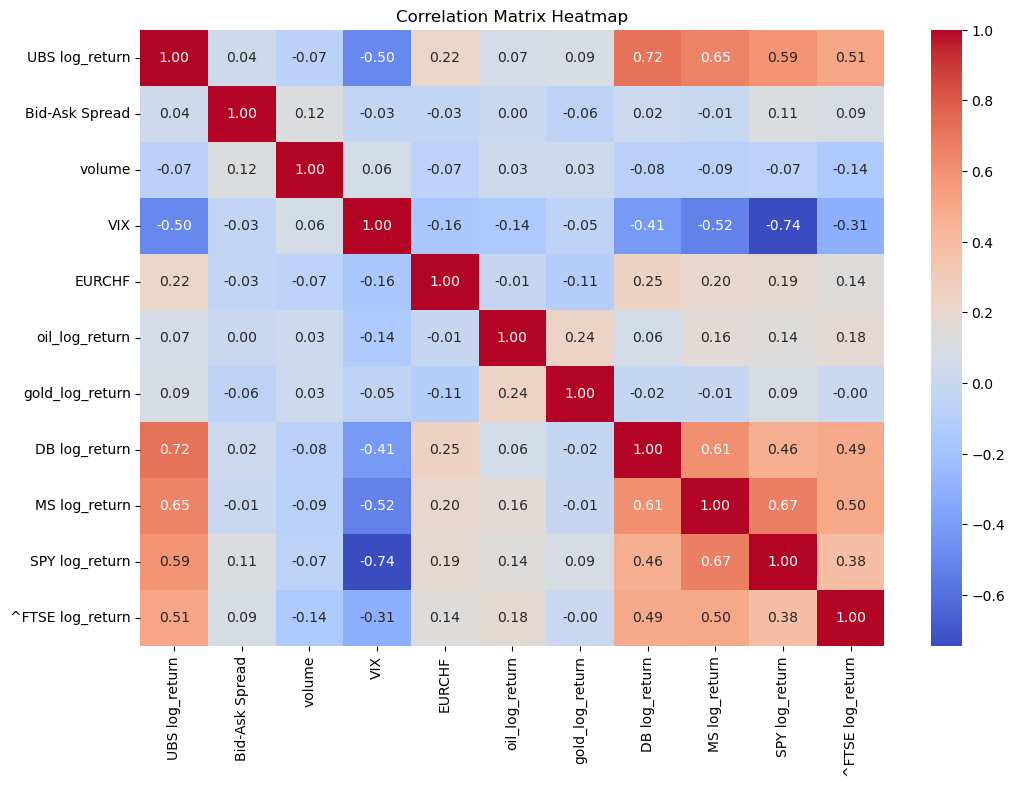

In [ ]:
# correlation testing:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df=pd.read_csv("data_prepared/training_dataset.csv")
df_numeric = df.drop(columns=["Date"])
# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

## 2. Model Prepared

defining time period(T), using training dataset(R) to construct models, and using testing datasets(P) to evaluate models.  
T=2021-01-04 ~2024-01-05  
R=2021-01-04 ~2023-01-02  
P= 2023-01-02~2024-01-05  


In [ ]:


training_dataset = pd.read_csv("data_prepared/training_dataset.csv")
testing_dataset = pd.read_csv("data_prepared/testing_dataset.csv")
training_dataset.head(5)
testing_dataset.head(5)

,Date,UBS log_return,Bid-Ask Spread,volume,VIX,EURCHF,oil_log_return,gold_log_return,DB log_return,MS log_return,SPY log_return,^FTSE log_return
0,2023-01-04,0.037779,0.755705,2567800,-0.039640,0.000426,-0.054631,0.007096,0.063684,0.010791,0.007691,0.004109
1,2023-01-05,-0.006624,0.756940,1910000,0.020239,-0.001247,0.011330,-0.009763,-0.027622,-0.008460,-0.011479,0.006347
2,2023-01-06,0.016730,2.557751,2614200,-0.061042,-0.001126,0.001356,0.015896,0.024411,0.018908,0.022673,0.008609
3,2023-01-09,0.005015,1.437562,2929800,0.038984,0.002799,0.011590,0.004549,0.000000,0.000913,-0.000567,0.003293
4,2023-01-10,0.012429,0.276420,1786900,-0.065358,0.000840,0.006544,-0.000588,0.015158,0.014500,0.006988,-0.003943


## 3. Model Building

### 3.1 ARIMA(p,d,q) model

ADF Statistic: -16.02348079408327
p-value: 6.167754488960626e-29
The series is stationary.
Finding the best ARIMAX parameters using auto_arima...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-2454.180, Time=0.69 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-359.536, Time=0.29 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-2458.570, Time=0.32 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-2458.713, Time=0.44 sec


/Users/CynthiaSY/miniforge3/envs/pymc_env/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1901: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/CynthiaSY/miniforge3/envs/pymc_env/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1908: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-2455.324, Time=0.45 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-2457.865, Time=0.61 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-2456.171, Time=0.49 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2456.716, Time=0.43 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 3.755 seconds
Best ARIMAX parameters: (0, 0, 1)


/Users/CynthiaSY/miniforge3/envs/pymc_env/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


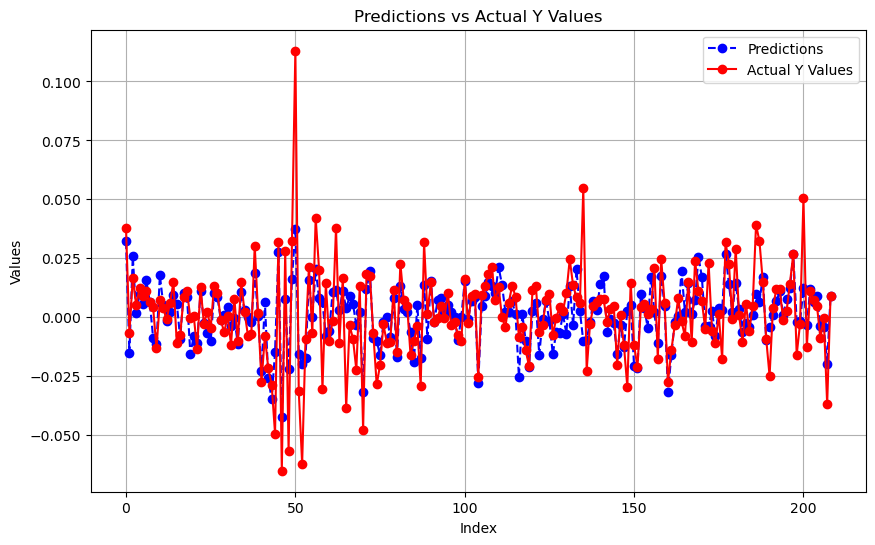

Mean Squared Forecast Error: 0.000181
ARIMAX Model MSFE:  0.00018104001111827437


In [2]:
from model.arimax import check_stationarity, arimax_model
from model.lib import plot_predictions_vs_actual, msfe

# stationary assumption
y_train = training_dataset["UBS log_return"]
check_stationarity(y_train)

arimax_predictions_df = arimax_model(training_dataset, testing_dataset)

# plot
plot_predictions_vs_actual(arimax_predictions_df, testing_dataset)

# MSFE
arimax_msfe = msfe(arimax_predictions_df, testing_dataset)
print("ARIMAX Model MSFE: ", arimax_msfe)

In [ ]:
### 3.2 Bayesian Model

In [ ]:
from model.bayesian import bayesian_model
from model.lib import plot_predictions_vs_actual, msfe

bay_predictions_df = bayesian_model(training_dataset, testing_dataset)

# plot
plot_predictions_vs_actual(bay_predictions_df, testing_dataset)

# MSFE
bay_msfe = msfe(bay_predictions_df, testing_dataset)
print("Bayesian Model MSFE: ", bay_msfe)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, beta, sigma]


Output()

### 3.3 Decision Trees

The decision tree model was applied to predict the UBS log returns using the features extracted from the dataset. While the model yielded relatively low Mean Squared Error (MSE) and Mean Absolute Error (MAE), indicating a reasonable fit to the training data, the **R² score** was not particularly high, at **0.386**. 

##### Key Observations:
1. **Low MSE and MAE**:
   - The low error metrics suggest that the model performs well in minimizing the absolute and squared differences between actual and predicted values. However, these metrics alone do not guarantee the model's ability to explain the variance in the data.

2. **Moderate R² Score**:
   - An R² score of 0.386 indicates that the decision tree model explains approximately 38.6% of the variance in UBS log returns. This highlights that there is significant variance in the data not captured by the model.

3. **Challenges in Improvement**:
   - Various feature engineering techniques were attempted, including:
     - Adding lagged values of UBS log returns as predictors.
     - Extracting date components (day, month, year) to consider potential seasonal effects.
     - Creating interaction terms, such as:
       - **Spread Volume**: The product of bid-ask spread and volume.
       - **VIX Oil**: The product of oil log return and VIX.
   - Despite these efforts, there was no significant improvement in the R² score.

4. **Hyperparameter Tuning**:
   - GridSearchCV was used to optimize the hyperparameters of the decision tree. However, the tuned model did not yield better performance in terms of the R² score.

##### Conclusion:
The decision tree model provides a baseline for predicting UBS log returns but may not be the best-suited algorithm for this dataset. Its limited ability to explain variance suggests that more sophisticated ensemble methods or additional features might be necessary for improvement.


Mean Absolute Error (MAE): 0.0100
Mean Squared Forecast Error (MSFE): 0.0002
R² Score: 0.3861


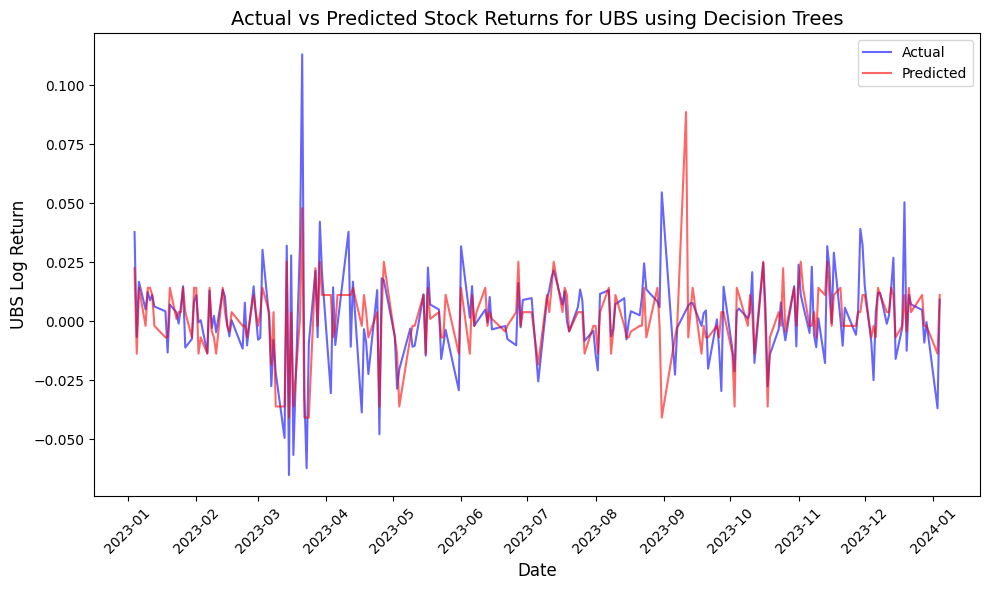

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure Date is in datetime format
training_dataset["Date"] = pd.to_datetime(training_dataset["Date"])
testing_dataset["Date"] = pd.to_datetime(testing_dataset["Date"])

# target-explanatory variables split
X_train = training_dataset.drop(columns=["UBS log_return", "Date"])
y_train = training_dataset["UBS log_return"]
X_test = testing_dataset.drop(columns=["UBS log_return", "Date"])
y_test = testing_dataset["UBS log_return"]

# Train the Decision Tree model
model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print Results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Forecast Error (MSFE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

plt.figure(figsize=(10, 6))

# Plot Actual values vs Predicted values
plt.plot(testing_dataset["Date"], y_test, label="Actual", color="blue", alpha=0.6)
plt.plot(testing_dataset["Date"], y_pred, label="Predicted", color="red", alpha=0.6)

# Format x-axis for dates (using DateFormatter for readability)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

# Add labels and title
plt.title("Actual vs Predicted Stock Returns for UBS using Decision Trees", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("UBS Log Return", fontsize=12)
plt.legend()
plt.tight_layout()
# Show the plot
plt.show()

#### Results of the Random Forest Model

The random forest -an extension of decision trees- model was applied to predict UBS log returns, leveraging its ensemble approach to improve prediction accuracy. The results demonstrated an improvement over the decision tree model, with a higher **R² score** and similarly low error metrics.

##### Key Observations:
1. **Low MSE and MAE**:
   - Like the decision tree model, the random forest achieved low Mean Squared Error (MSE) and Mean Absolute Error (MAE), confirming its effectiveness in reducing prediction errors.

2. **Improved R² Score**:
   - The R² score increased to **0.54**, indicating that the random forest model explains 54% of the variance in UBS log returns. While this represents a notable improvement over the decision tree, it still suggests that additional variance remains unexplained.

3. **Hyperparameter Tuning**:
   - GridSearchCV was used to optimize the random forest's hyperparameters, including:
     - The number of estimators (trees in the forest).
     - The maximum depth of the trees.
     - Minimum samples for splitting nodes.
   - Despite this tuning, no significant improvement in the R² score was observed, suggesting that the model might be close to its performance limit for the current features and data.

4. **Strengths of Random Forest**:
   - The model benefitted from its ability to handle feature interactions and reduce overfitting through averaging across multiple trees.
   - This resulted in a more robust performance compared to the decision tree, particularly in capturing complex patterns in the data.

##### Conclusion:
The random forest model demonstrates better performance than the decision tree, achieving a higher R² score and maintaining low error metrics. However, the moderate R² score indicates room for improvement, potentially through advanced feature engineering, inclusion of additional external factors, or exploration of other machine learning models which we'll dive into next!


Random Forest MAE: 0.008832678680465675
Random Forest MSE: 0.0001774376554193231
Random Forest R² Score: 0.5429447173170785


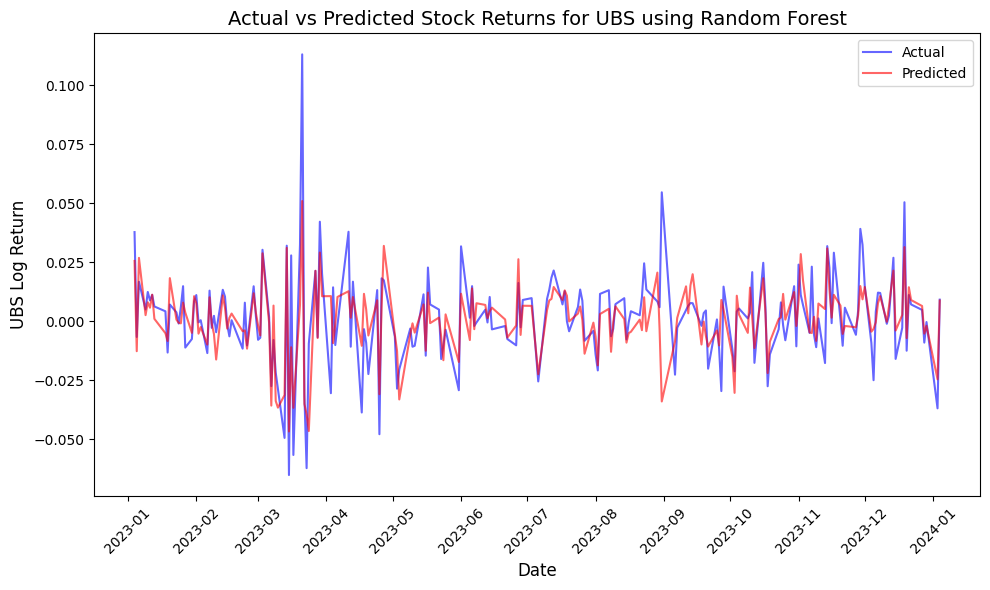

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Ensure Date is in datetime format
training_dataset["Date"] = pd.to_datetime(training_dataset["Date"])
testing_dataset["Date"] = pd.to_datetime(testing_dataset["Date"])

# target-explanatory variables split
X_train = training_dataset.drop(columns=["UBS log_return", "Date"])
y_train = training_dataset["UBS log_return"]
X_test = testing_dataset.drop(columns=["UBS log_return", "Date"])
y_test = testing_dataset["UBS log_return"]

# Initialize Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train and evaluate
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred))
print("Random Forest R² Score:", r2_score(y_test, y_pred))

plt.figure(figsize=(10, 6))

# Plot Actual values vs Predicted values
plt.plot(testing_dataset["Date"], y_test, label="Actual", color="blue", alpha=0.6)
plt.plot(testing_dataset["Date"], y_pred, label="Predicted", color="red", alpha=0.6)

# Format x-axis for dates (using DateFormatter for readability)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

# Add labels and title
plt.title("Actual vs Predicted Stock Returns for UBS using Random Forest", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("UBS Log Return", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

### 3.4 Gradient Boosting Machines (GBM)

Mean Squared Error (MSE): 0.000192
Root Mean Squared Error (RMSE): 0.013846
R-squared Score: 0.506155

Feature Importance:
            feature  importance
6     DB log_return    0.455480
1            volume    0.172711
7     MS log_return    0.115245
8    SPY log_return    0.073310
5   gold_log_return    0.042965
0    Bid-Ask Spread    0.035680
2               VIX    0.032045
9  ^FTSE log_return    0.027640
4    oil_log_return    0.022780
3            EURCHF    0.022144


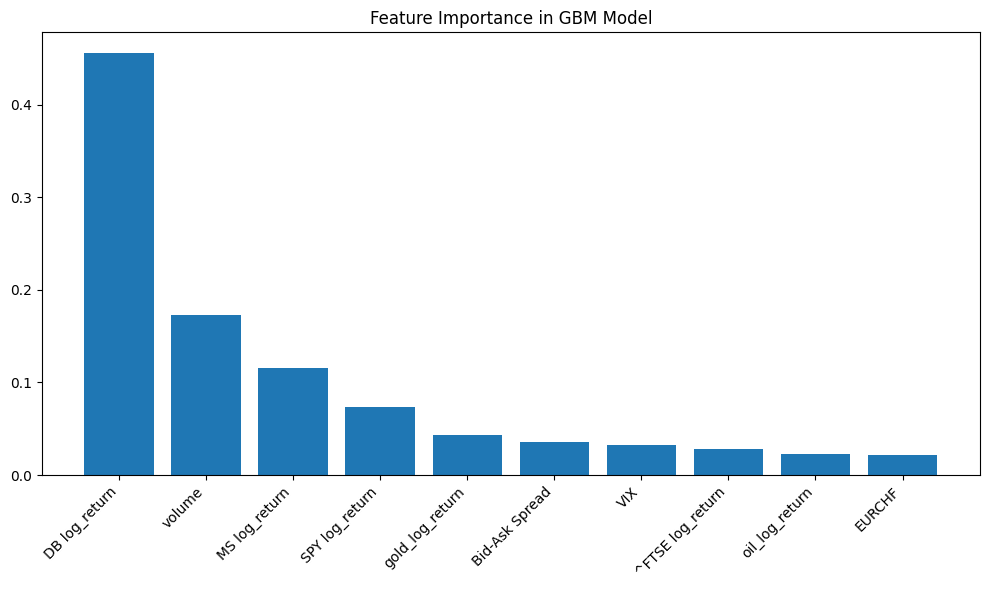

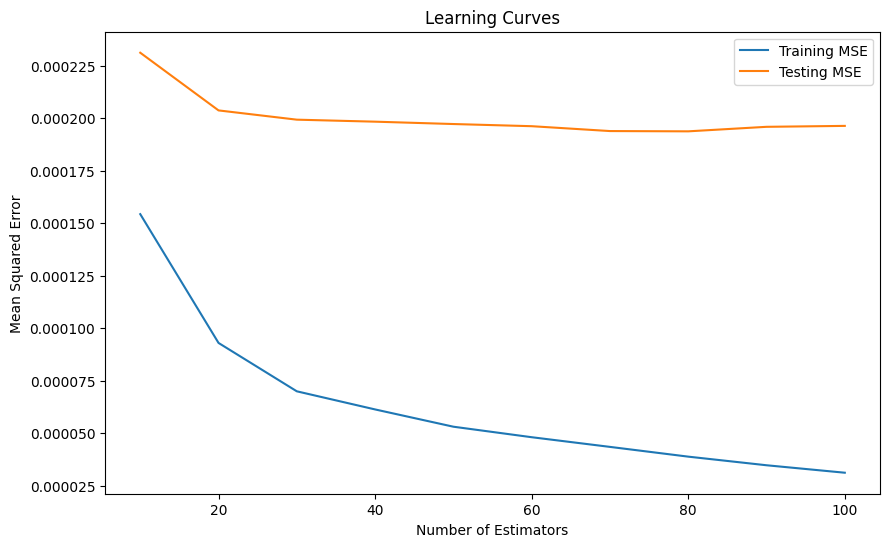

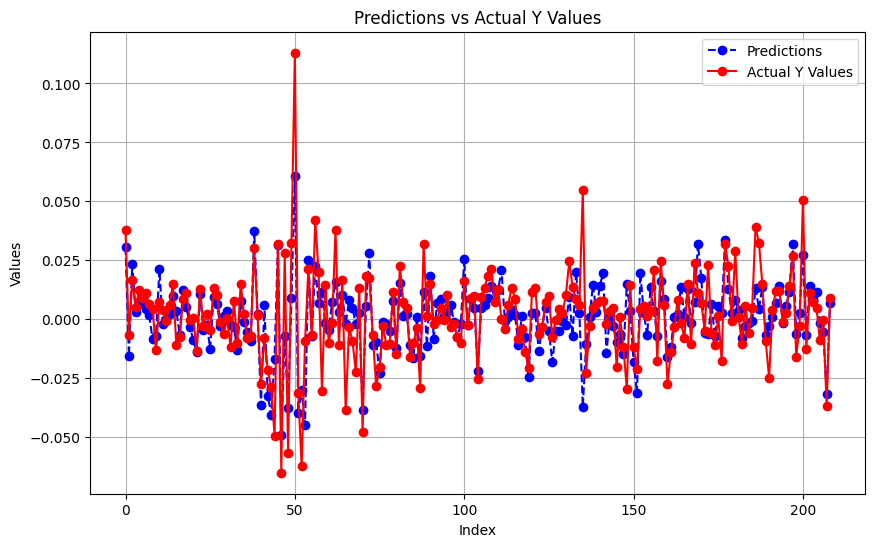

Mean Squared Forecast Error: 0.000192
GBM Model MSFE:  0.00019172030564769863


In [ ]:
from model.gbm import gbm_model
from model.lib import plot_predictions_vs_actual, msfe

gbm_predictions_df = gbm_model(training_dataset, testing_dataset)

# plot
plot_predictions_vs_actual(gbm_predictions_df, testing_dataset)

# MSFE
gbm_msfe = msfe(gbm_predictions_df, testing_dataset)
print("GBM Model MSFE: ", gbm_msfe)

### 3.5 Neural Networks 

2024-12-03 18:19:38.262968: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-03 18:19:39.121574: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-12-03 18:19:40.046428: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-03 18:19:40.074361: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the requir

Epoch 1/50
14/14 [==============================] - 3s 6ms/step - loss: 2.3545e-04 - mae: 0.0111
Epoch 2/50
14/14 [==============================] - 0s 6ms/step - loss: 1.0903e-04 - mae: 0.0074
Epoch 3/50
14/14 [==============================] - 0s 6ms/step - loss: 8.0344e-05 - mae: 0.0066
Epoch 4/50
14/14 [==============================] - 0s 6ms/step - loss: 6.6443e-05 - mae: 0.0057
Epoch 5/50
14/14 [==============================] - 0s 6ms/step - loss: 4.2125e-05 - mae: 0.0048
Epoch 6/50
14/14 [==============================] - 0s 6ms/step - loss: 3.9073e-05 - mae: 0.0047
Epoch 7/50
14/14 [==============================] - 0s 6ms/step - loss: 4.3862e-05 - mae: 0.0050
Epoch 8/50
14/14 [==============================] - 0s 6ms/step - loss: 3.1536e-05 - mae: 0.0041
Epoch 9/50
14/14 [==============================] - 0s 6ms/step - loss: 2.3502e-05 - mae: 0.0037
Epoch 10/50
14/14 [==============================] - 0s 7ms/step - loss: 2.9385e-05 - mae: 0.0038
Epoch 11/50
14/14 [==========

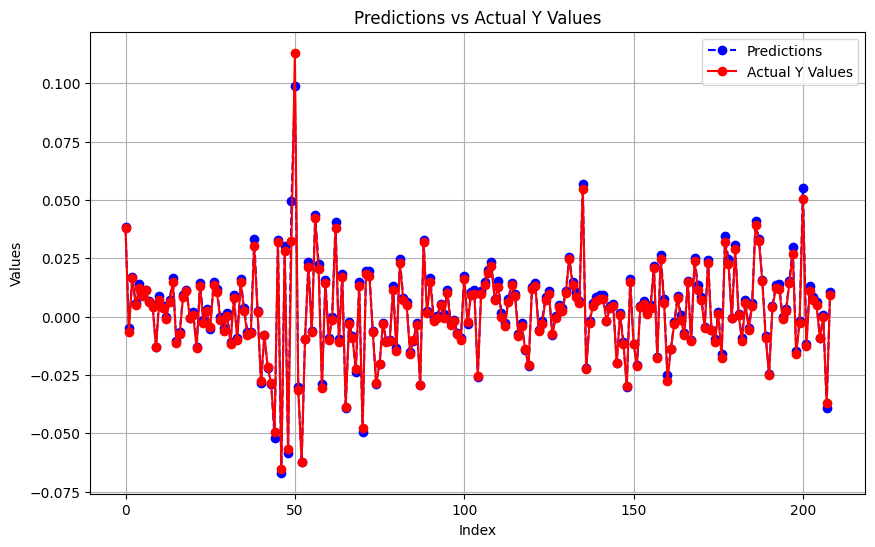

Mean Squared Forecast Error: 0.000004
LSTM Model MSFE:  3.9229473660906065e-06


In [ ]:
from model.lstm import lstm

lstm_predictions = pd.DataFrame(lstm(training_dataset, testing_dataset).flatten())
lstm_predictions.columns = ["Prediction"]

plot_predictions_vs_actual(lstm_predictions, testing_dataset)
lstm_msfe = msfe(lstm_predictions, testing_dataset)
print("LSTM Model MSFE: ", lstm_msfe)
